**1. 1차원데이터분석**

1.** **변수종류파악( 수치형/ 범주형/ 시간형)**

2.** **변수종류별분석지표( 수치형/ 범주형/ 시간형)**

3.** **시각화**

- **도수분포표/ 히스토그램/ 상자그림**

**2. 2차원데이터분석**

1.** **공분산/ 상관계수**

2.** **다중공선성확인**

3.** **시각화**

- **산점도/ 회귀직선/ 히트맵**

# 항공사 지연요인 데이터 탐색적 분석

출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

- airline : 항공사
- carrier_deay : 항공사 지연 요인
- atc_delay : ATC 항공교통관제 지연 요인
- weather_delay : 날씨로 인한 지연 요인

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

# 1. 변수 탐색

- 수치형/범주형변수

In [4]:
df = pd.read_csv("./data/airline_stats.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


범주형 변수 : airline
수치형 변수 : pct_carrier_delay,	pct_atc_delay,	pct_weather_delay

In [5]:
df.select_dtypes(include='number').head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
0,8.153226,1.971774,0.762097
1,5.959924,3.706107,1.585878
2,7.157270,2.706231,2.026706
3,12.100000,11.033333,0.000000
4,7.333333,3.365591,1.774194


In [6]:
#수치형변수의 최대/최소/대표값
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [7]:
#범주형 변수의 값목록
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

In [8]:
df.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [9]:
#항공사별 기술통계 비교
df.groupby('airline')['pct_carrier_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,3.521889,9.042180,6.333460,8.081843,7.521997,7.398833
std,2.483224,4.139067,4.695292,3.797737,3.345085,5.369283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.935484,6.338538,3.813989,5.341176,5.070294,4.034708
50%,3.225806,8.428571,5.548387,7.657895,6.960930,6.445210
75%,4.685599,10.988763,7.821952,10.280000,9.354839,9.633110
max,22.290323,50.000000,100.000000,28.000000,24.800000,100.000000


해석: 

In [10]:
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

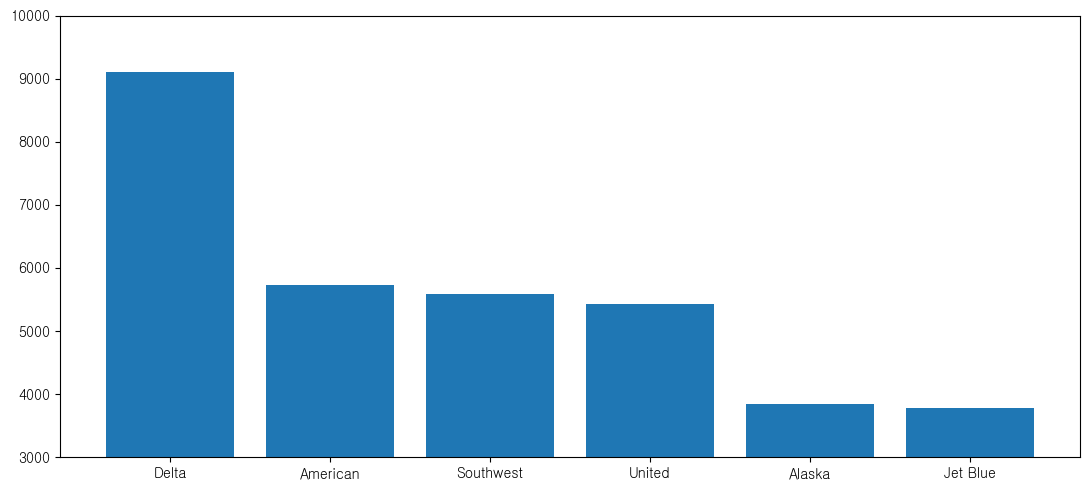

In [11]:
airline_counts = df['airline'].value_counts()
max_count = df['airline'].value_counts().max()

plt.figure(figsize=(11, 5))
plt.bar(airline_counts.index, airline_counts)
plt.ylim(3000, 10000)
plt.tight_layout()
plt.show()

In [12]:
# 결측치 확인
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

In [13]:
# 항공사별 결측치 수를 전체 컬럼에 대해 확인
df.groupby('airline').apply(lambda x: x.isnull().sum()) # df.groupby('airline').apply(lambda x: x.isnull().sum().sum()) < 항공사별 결측치 합

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
airline,,,,
Alaska,0,0,0,0
American,2,2,2,0
Delta,12,12,12,0
Jet Blue,2,2,2,0
Southwest,0,0,0,0
United,12,12,12,0


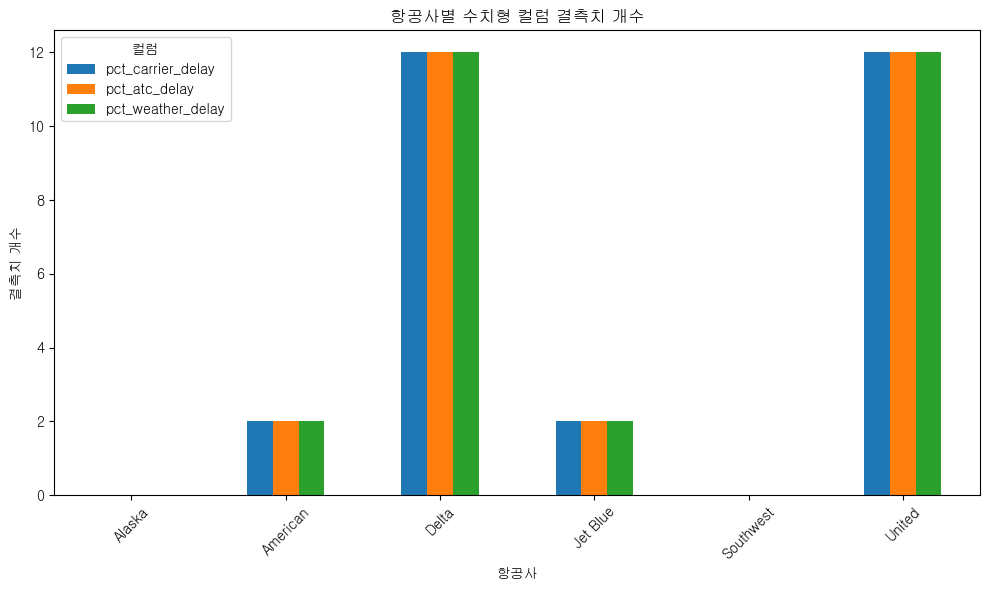

In [14]:
numerical_cols = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
# 항공사별로 수치형 컬럼의 결측치 개수 계산
missing_counts = df.groupby('airline')[numerical_cols].apply(lambda x: x.isnull().sum())

# 시각화
missing_counts.plot(kind='bar', figsize=(10, 6))
plt.title('항공사별 수치형 컬럼 결측치 개수')
plt.xlabel('항공사')
plt.ylabel('결측치 개수')
plt.xticks(rotation=45)
plt.legend(title='컬럼')
plt.tight_layout()
plt.show()

In [15]:
# 결측치 처리 > 방법 설명
# 결측치 행 제거(X), 전체 평균(X), 항공사별 평균(O)
# 결측치 28개뿐 (매우적다)
# 결측치 패턴
# 각 항공사별 결측치

In [16]:
# 결측치 확인
df[df.isnull().any(axis=1)].head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
4809,NaN,NaN,NaN,Jet Blue
6123,NaN,NaN,NaN,Jet Blue
7069,NaN,NaN,NaN,Delta
9241,NaN,NaN,NaN,Delta
12081,NaN,NaN,NaN,United


In [17]:
# 1. 결측값이 있는 행 제거
df_dropna = df.dropna()

# 2. 전체 평균으로 결측값 대체
df_filled = df.copy()
for col in ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']:
    df_filled[col] = df_filled[col].fillna(df_filled[col].mean())
    
# 3. 항공사별 평균으로 결측값 대체
df_group_filled = df.copy()
for col in ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']:
    df_group_filled[col] = df_group_filled.groupby('airline')[col]\
                                          .transform(lambda x: x.fillna(x.mean()))
    

In [18]:
# 수치형 변수만 추출
numerical_cols = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
desc_dropna = df_dropna[numerical_cols].describe().add_prefix('dropna_')
desc_filled = df_filled[numerical_cols].describe().add_prefix('filled_')
desc_group = df_group_filled[numerical_cols].describe().add_prefix('group_')

summary_all = pd.concat([desc_dropna, desc_filled, desc_group], axis=1)
summary_all

,dropna_pct_carrier_delay,dropna_pct_atc_delay,dropna_pct_weather_delay,filled_pct_carrier_delay,filled_pct_atc_delay,filled_pct_weather_delay,group_pct_carrier_delay,group_pct_atc_delay,group_pct_weather_delay
count,33440.000000,33440.000000,33440.000000,33468.000000,33468.000000,33468.000000,33468.000000,33468.000000,33468.000000
mean,7.041475,5.089962,0.684776,7.041475,5.089962,0.684776,7.041531,5.090018,0.684786
std,4.497596,4.718647,1.073743,4.495714,4.716672,1.073294,4.495773,4.716727,1.073301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000,4.147084,2.148281,0.000000,4.147084,2.148281,0.000000
50%,6.356893,3.900000,0.316002,6.359631,3.903367,0.316655,6.357260,3.903367,0.316655
75%,9.140474,6.630238,0.935161,9.136141,6.625000,0.934579,9.136141,6.626106,0.934579
max,100.000000,100.000000,33.333333,100.000000,100.000000,33.333333,100.000000,100.000000,33.333333


딜레이 된 상황에서 분석하기 위해서 결측치는 제거한다.

# 2.시각적 분석(히스토그램)
해석

In [28]:
df['airline'].unique()


array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

In [20]:
# 분석할 수치형 변수 목록
numerical_cols = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']

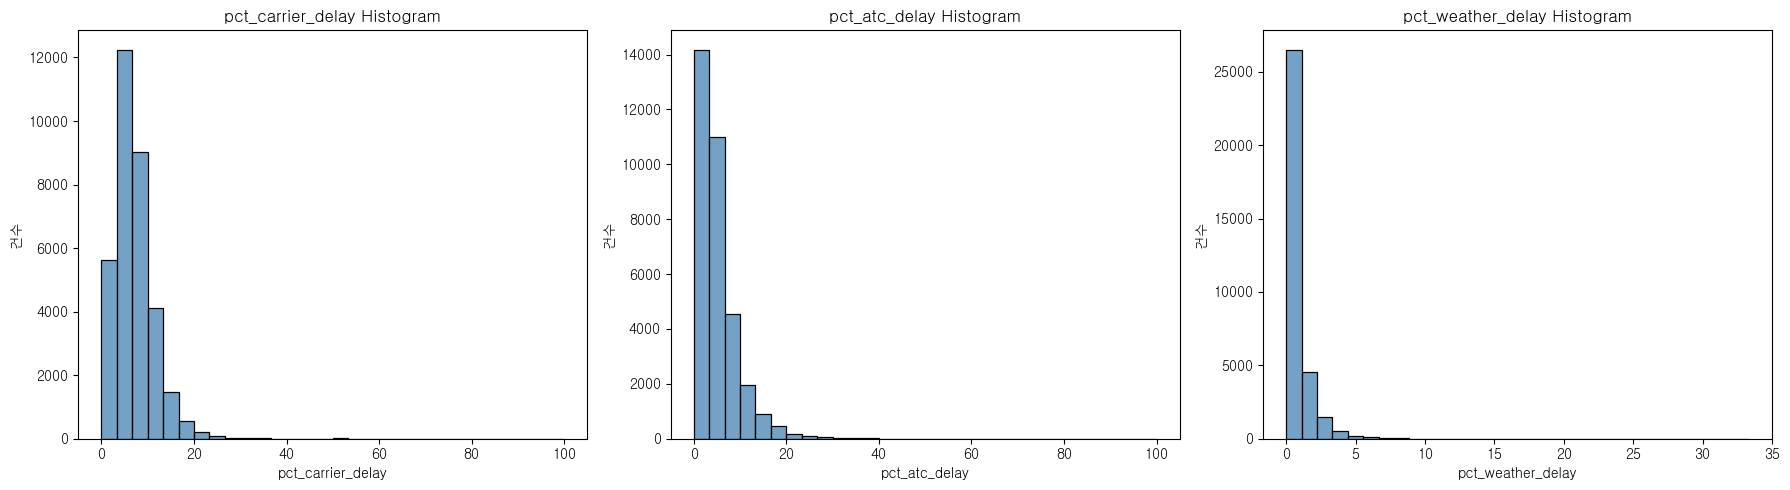

In [21]:
#항목별 전체 항공사별 지연율 (Histogram)

# subplot으로 시각화
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, ax=axs[i], color='steelblue')
    axs[i].set_title(f'{col} Histogram')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('건수')

plt.tight_layout()
plt.show()

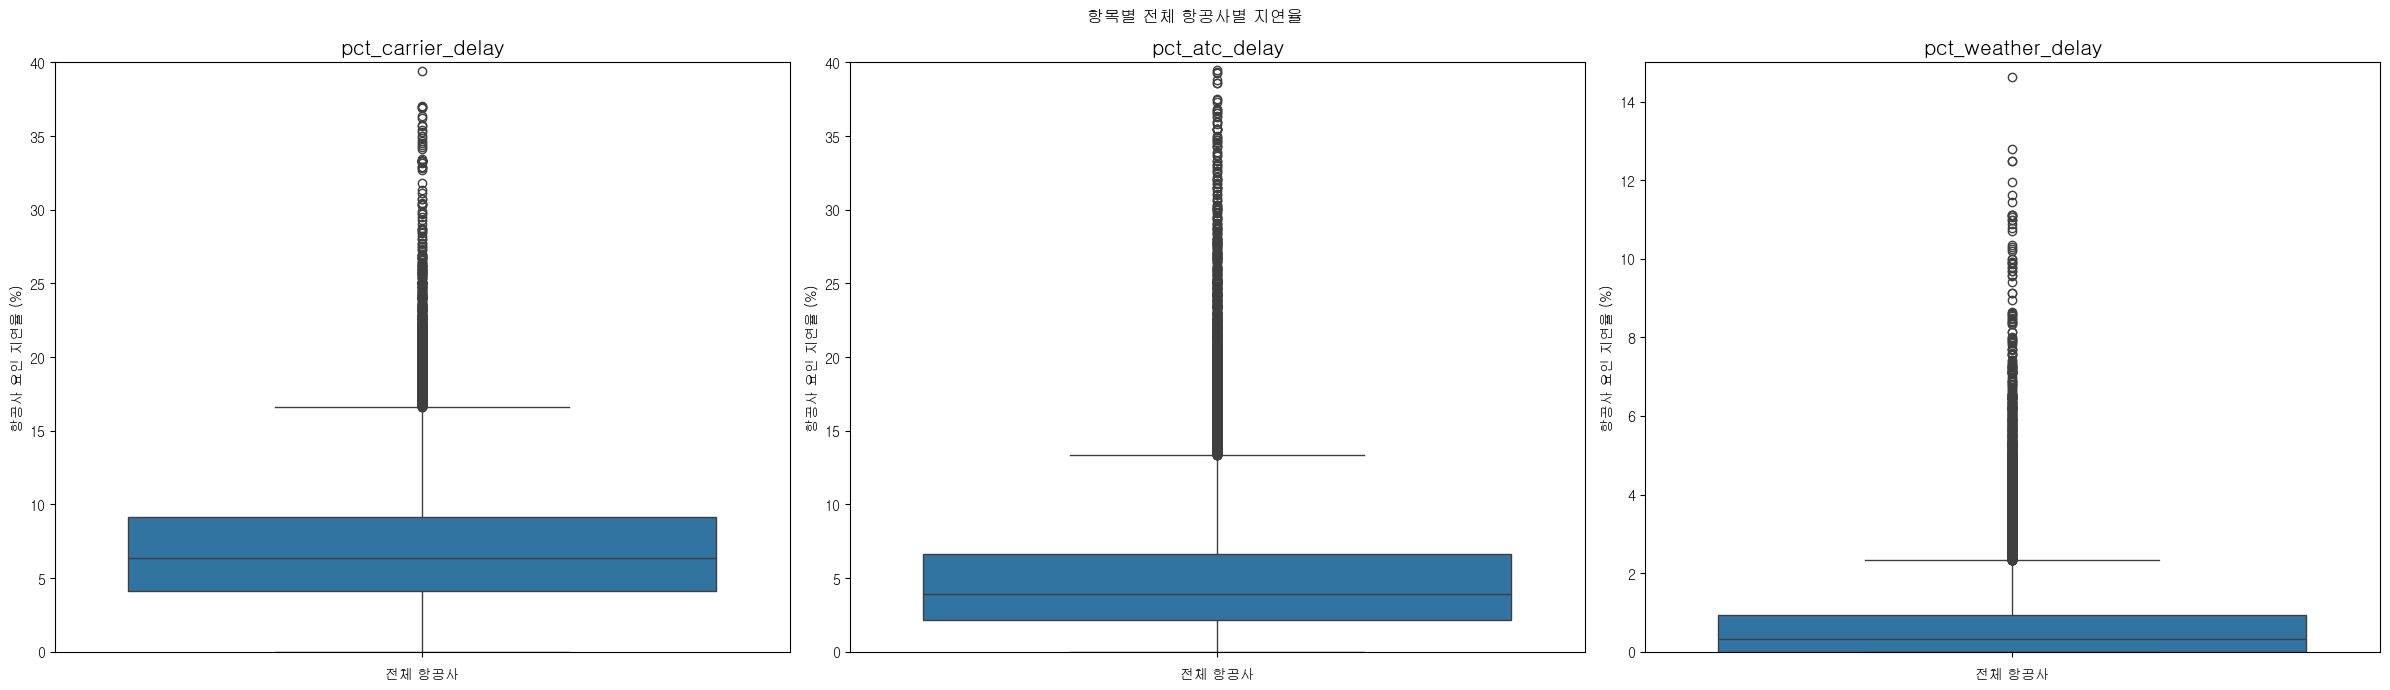

In [22]:
# 항목별 전체 항공사별 지연율 (Boxplot)

fig, axes = plt.subplots(1, 3, figsize=(24, 7))  # 1행 3열, 전체 사이즈 조정
plt.suptitle('항목별 전체 항공사별 지연율')
# 1. pct_carrier_delay
sns.boxplot(data=df, y='pct_carrier_delay', ax=axes[0])
axes[0].set_title('pct_carrier_delay', fontsize=15)
axes[0].set_xlabel('전체 항공사')
axes[0].set_ylabel('항공사 요인 지연율 (%)')
axes[0].set_ylim(0,40)
axes[0].tick_params(axis='x', rotation=45)

# 2. pct_atc_delay
sns.boxplot(data=df, y='pct_atc_delay', ax=axes[1])
axes[1].set_title('pct_atc_delay', fontsize=15)
axes[1].set_xlabel('전체 항공사')
axes[1].set_ylabel('항공사 요인 지연율 (%)')
axes[1].set_ylim(0,40)
axes[1].tick_params(axis='x', rotation=45)

# 3. pct_weather_delay
sns.boxplot(data=df, y='pct_weather_delay', ax=axes[2])
axes[2].set_title('pct_weather_delay', fontsize=15)
axes[2].set_xlabel('전체 항공사')
axes[2].set_ylabel('항공사 요인 지연율 (%)')
axes[2].set_ylim(0, 15)  # y축 범위 조정
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()  # subplot 간 간격 자동 조절
plt.show()


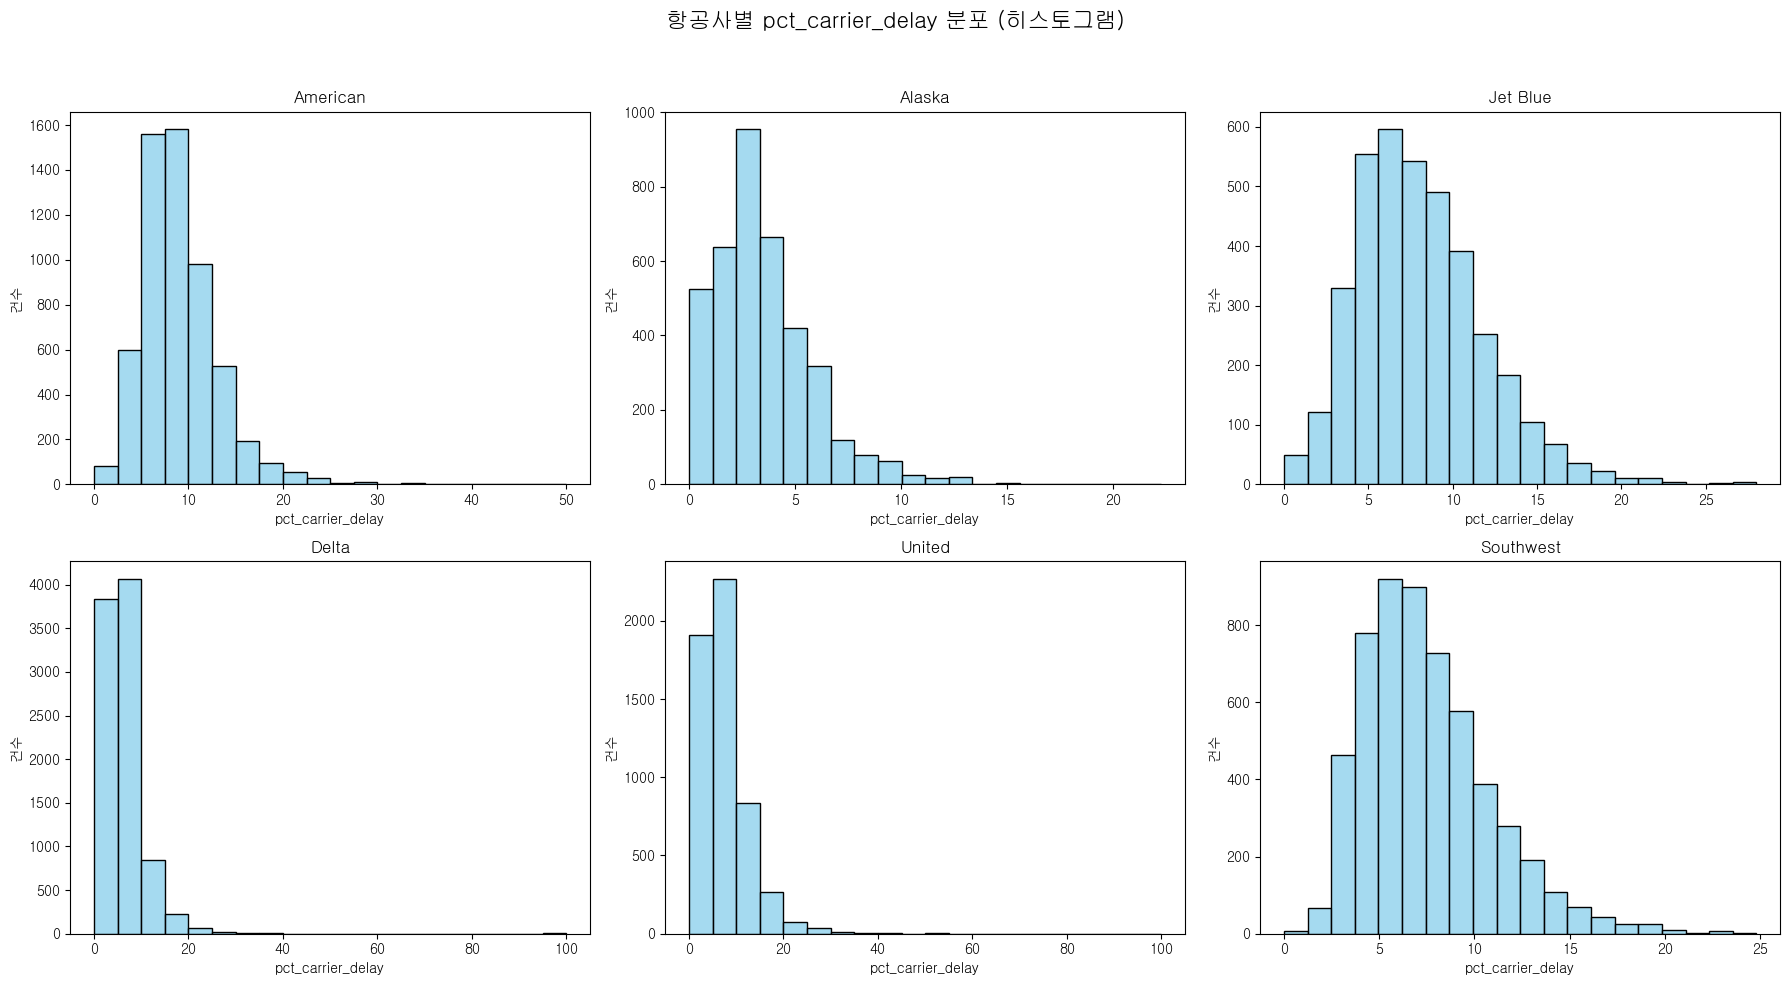

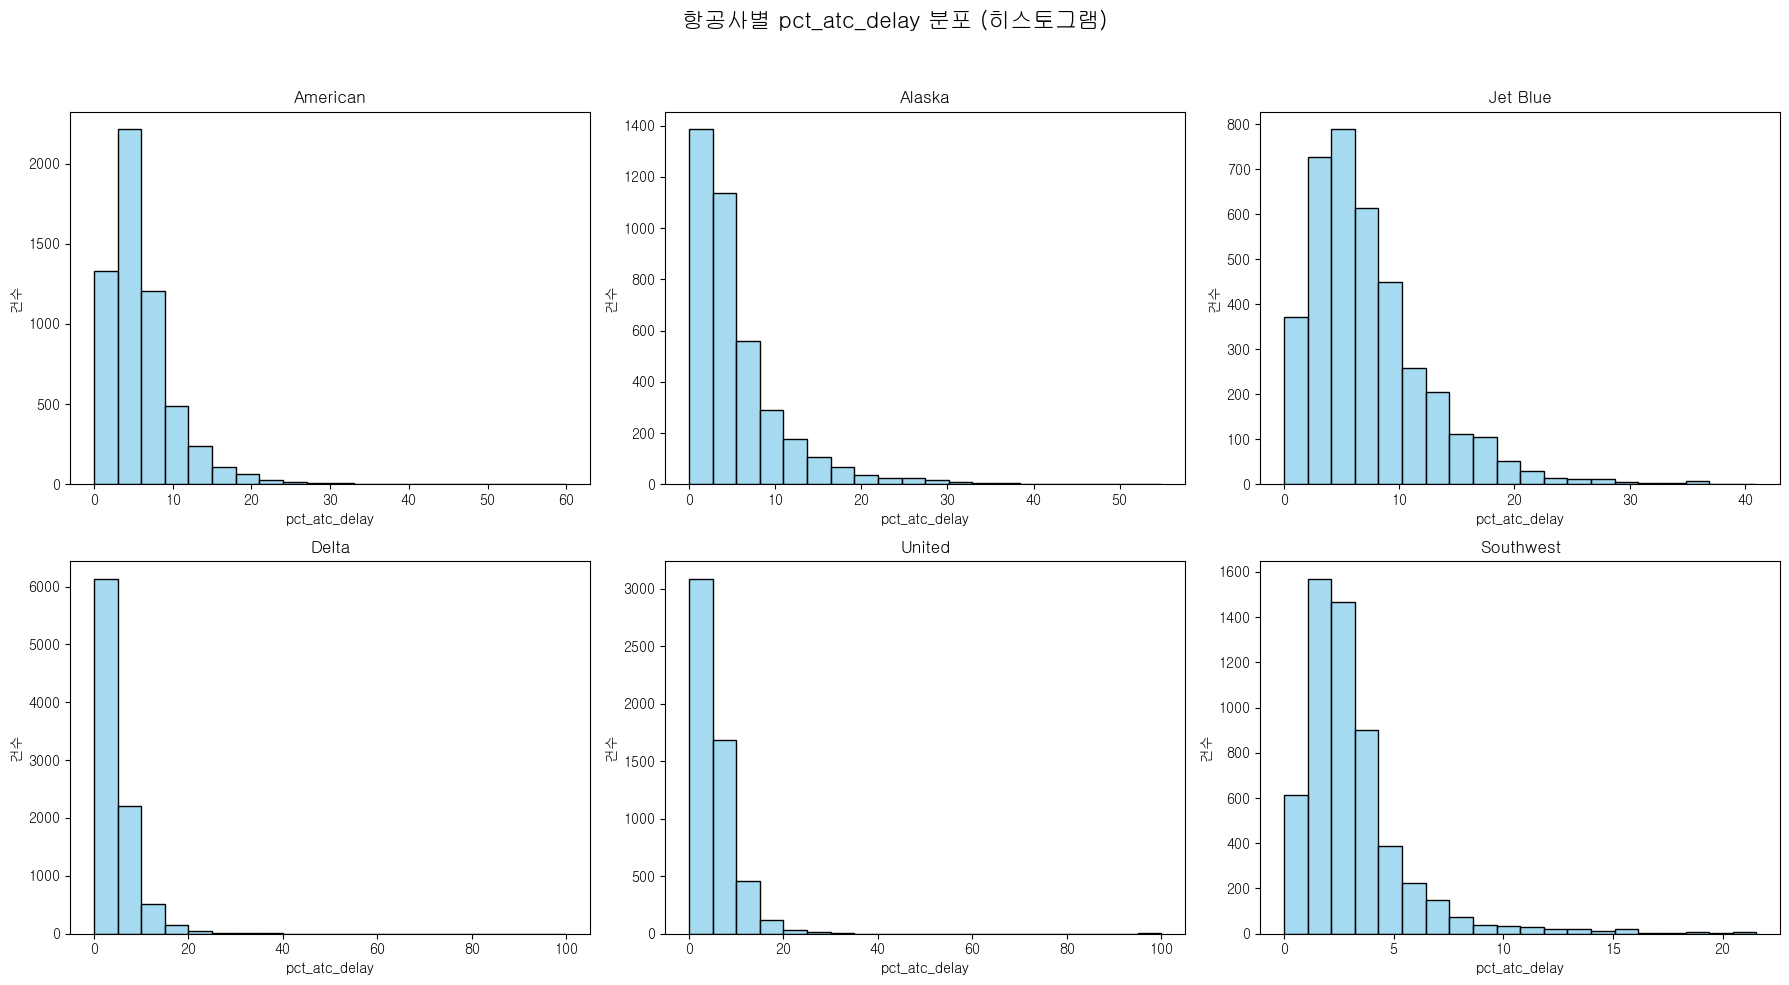

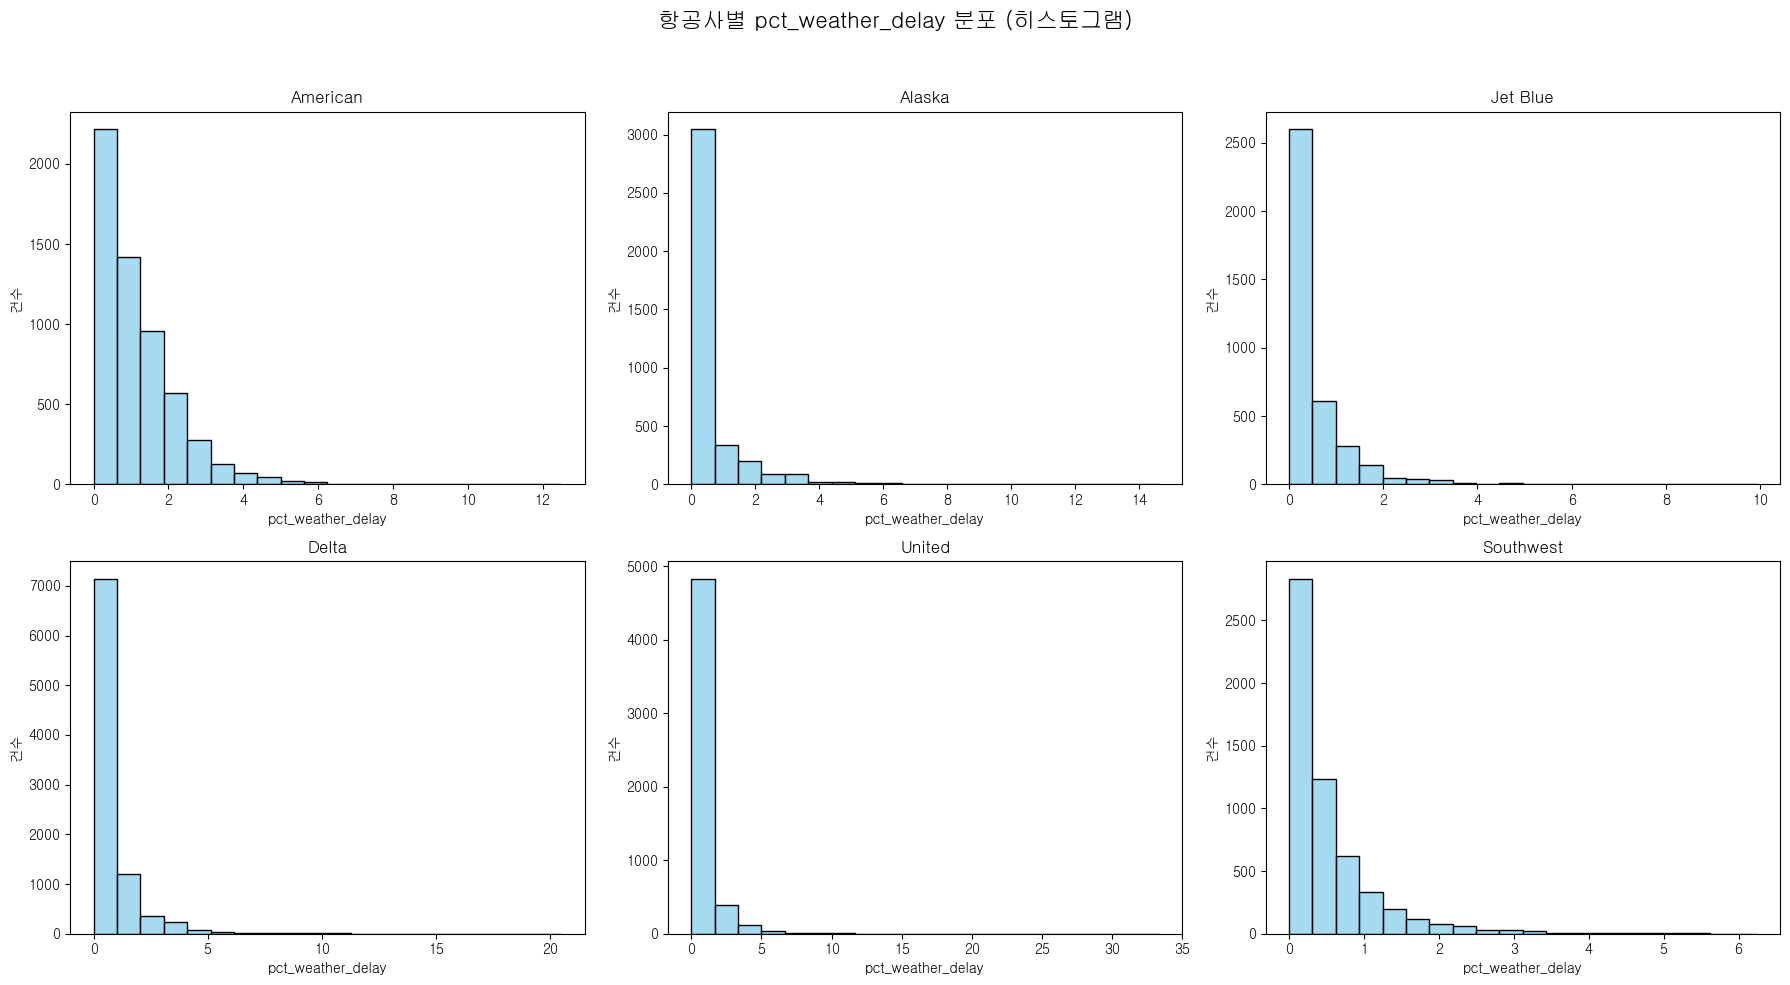

In [23]:
# 항공사별 수치형 데이터(Histogram)

# 항공사 목록
airlines = df['airline'].unique()

# 각 수치형 변수마다 반복
for col in numerical_cols:
    plt.figure(figsize=(18, 10))
    plt.suptitle(f'항공사별 {col} 분포 (히스토그램)', fontsize=16)
    
    for i, airline in enumerate(airlines, 1):
        plt.subplot(2, 3, i)  # 최대 6개 항공사 기준 2행 3열
        sns.histplot(data=df[df['airline'] == airline], x=col, bins=20, color='skyblue')
        plt.title(airline)
        plt.xlabel(col)
        plt.ylabel('건수')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# 3. 박스플롯   
 전체, 항공사별 분석   
 분석 결과

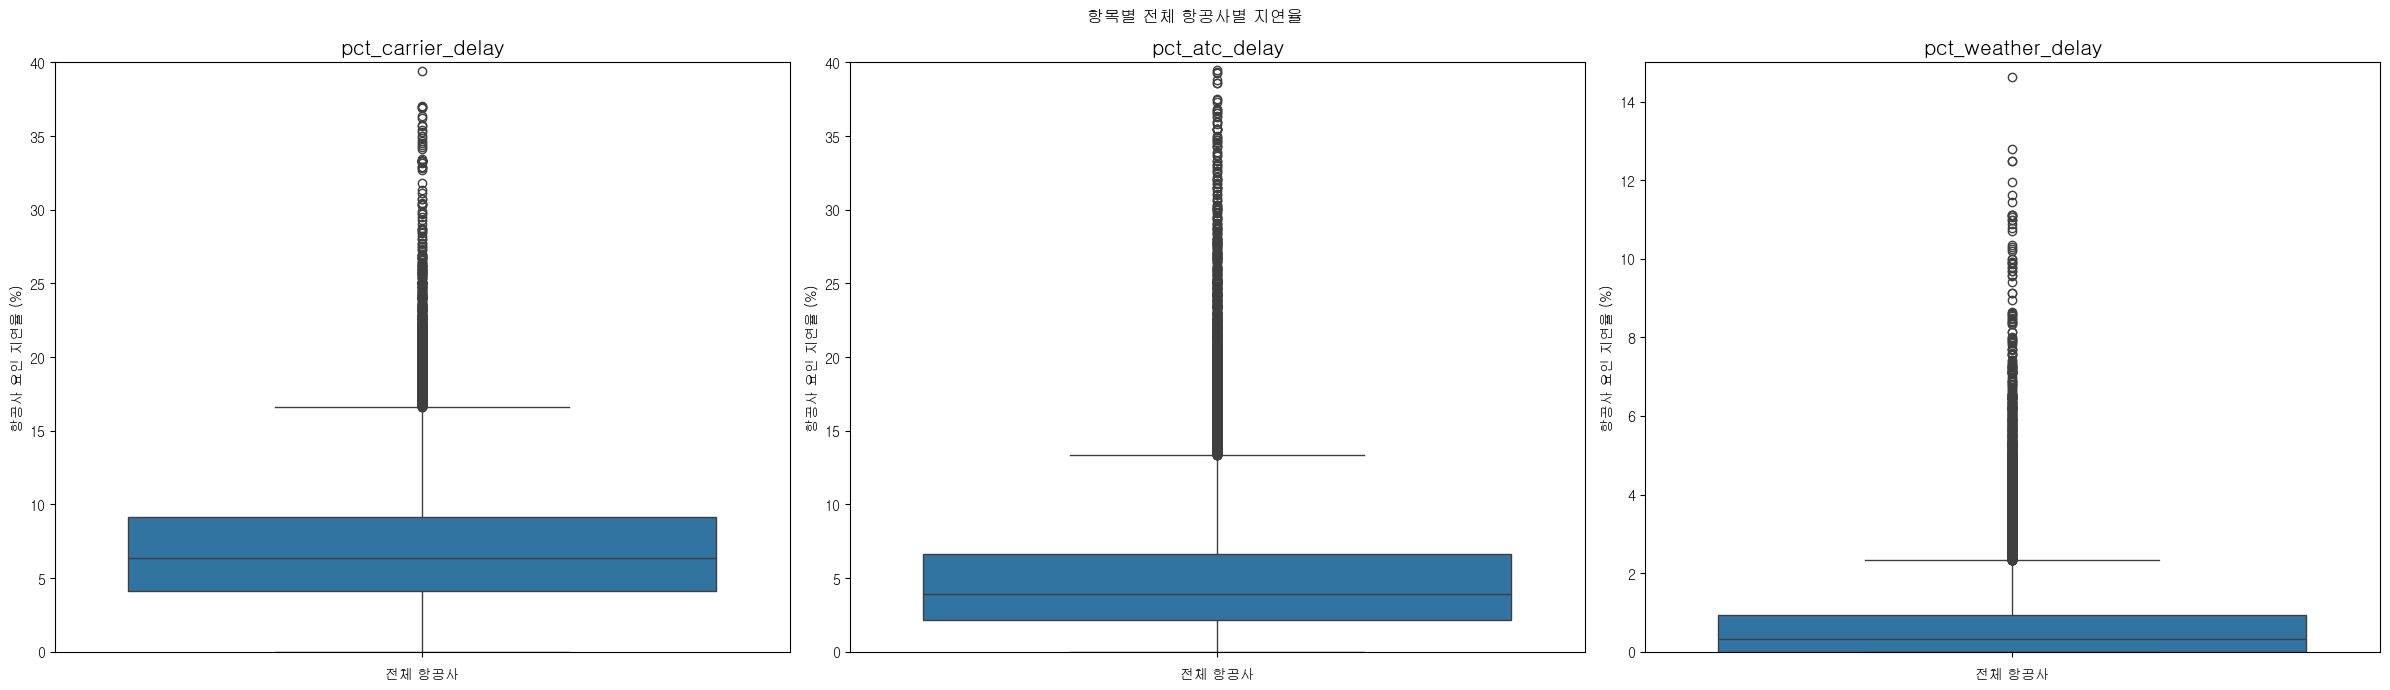

In [24]:
# 항목별 전체 항공사별 지연율 (Boxplot)

fig, axes = plt.subplots(1, 3, figsize=(24, 7))  # 1행 3열, 전체 사이즈 조정
plt.suptitle('항목별 전체 항공사별 지연율')
# 1. pct_carrier_delay
sns.boxplot(data=df, y='pct_carrier_delay', ax=axes[0])
axes[0].set_title('pct_carrier_delay', fontsize=15)
axes[0].set_xlabel('전체 항공사')
axes[0].set_ylabel('항공사 요인 지연율 (%)')
axes[0].set_ylim(0,40)
axes[0].tick_params(axis='x', rotation=45)

# 2. pct_atc_delay
sns.boxplot(data=df, y='pct_atc_delay', ax=axes[1])
axes[1].set_title('pct_atc_delay', fontsize=15)
axes[1].set_xlabel('전체 항공사')
axes[1].set_ylabel('항공사 요인 지연율 (%)')
axes[1].set_ylim(0,40)
axes[1].tick_params(axis='x', rotation=45)

# 3. pct_weather_delay
sns.boxplot(data=df, y='pct_weather_delay', ax=axes[2])
axes[2].set_title('pct_weather_delay', fontsize=15)
axes[2].set_xlabel('전체 항공사')
axes[2].set_ylabel('항공사 요인 지연율 (%)')
axes[2].set_ylim(0, 15)  # y축 범위 조정
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()  # subplot 간 간격 자동 조절
plt.show()


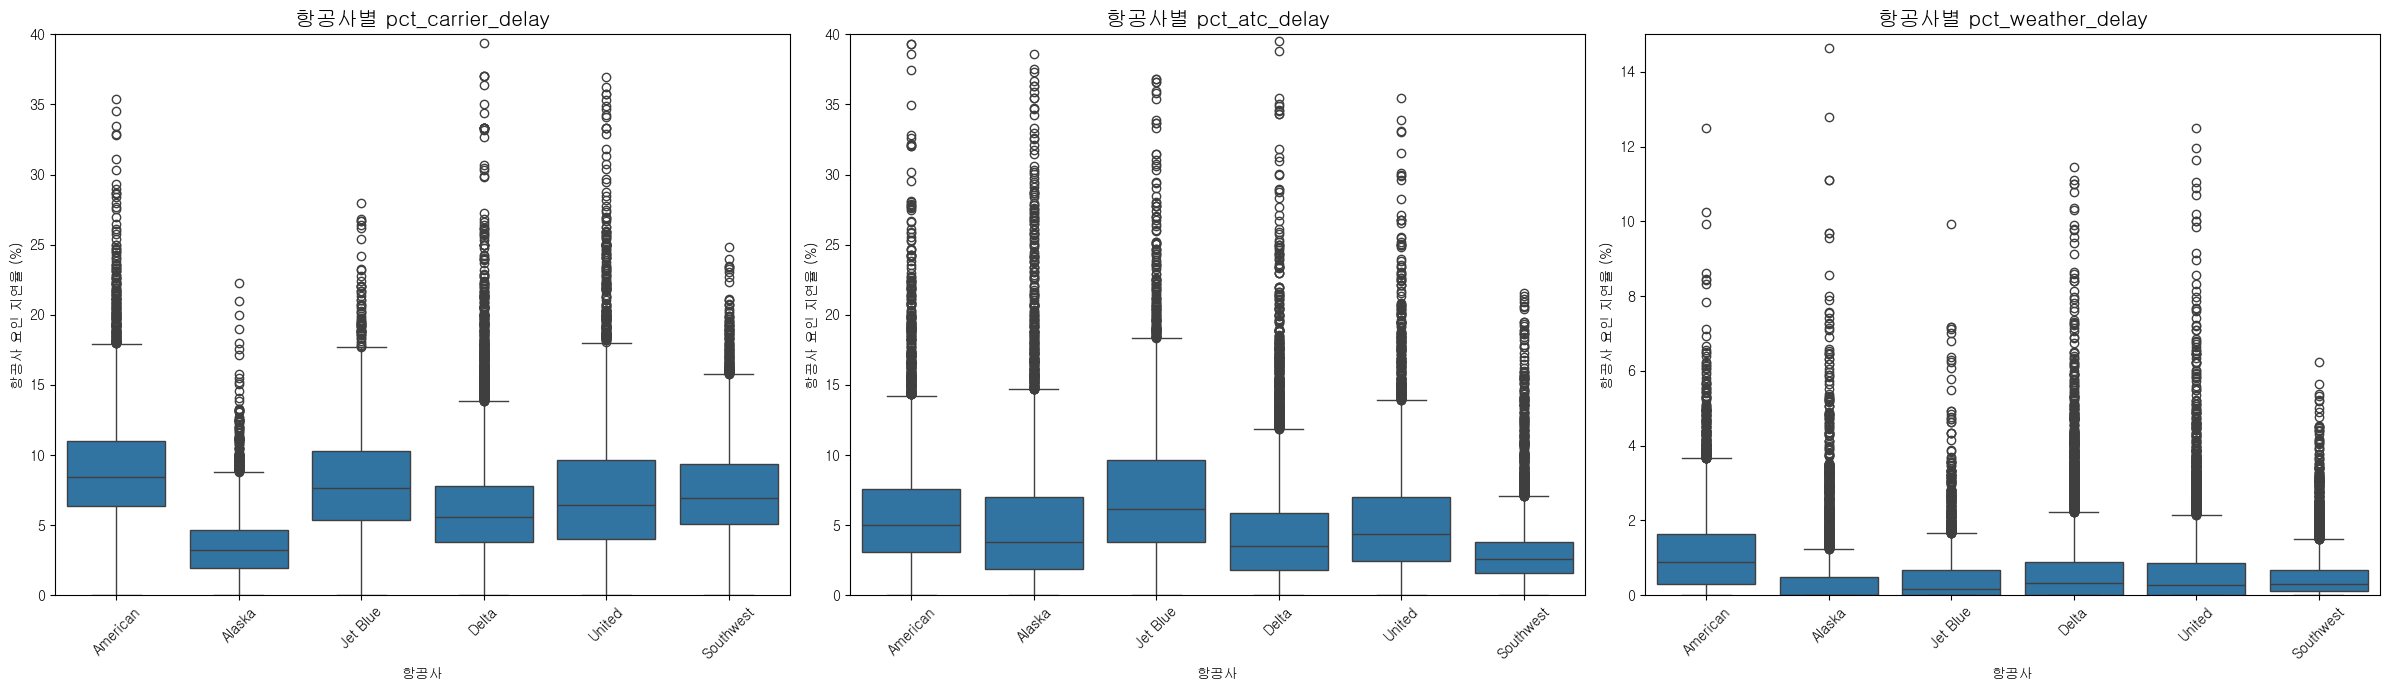

In [25]:
# 항공사별 수치형 데이터(Boxplot)

fig, axes = plt.subplots(1, 3, figsize=(24, 7))  # 1행 3열, 전체 사이즈 조정

# 1. pct_carrier_delay
sns.boxplot(data=df, x='airline', y='pct_carrier_delay', ax=axes[0])
axes[0].set_title('항공사별 pct_carrier_delay', fontsize=15)
axes[0].set_xlabel('항공사')
axes[0].set_ylabel('항공사 요인 지연율 (%)')
axes[0].set_ylim(0,40)
axes[0].tick_params(axis='x', rotation=45)

# 2. pct_atc_delay
sns.boxplot(data=df, x='airline', y='pct_atc_delay', ax=axes[1])
axes[1].set_title('항공사별 pct_atc_delay', fontsize=15)
axes[1].set_xlabel('항공사')
axes[1].set_ylabel('항공사 요인 지연율 (%)')
axes[1].set_ylim(0,40)
axes[1].tick_params(axis='x', rotation=45)

# 3. pct_weather_delay
sns.boxplot(data=df, x='airline', y='pct_weather_delay', ax=axes[2])
axes[2].set_title('항공사별 pct_weather_delay', fontsize=15)
axes[2].set_xlabel('항공사')
axes[2].set_ylabel('항공사 요인 지연율 (%)')
axes[2].set_ylim(0, 15)  # y축 범위 조정
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()  # subplot 간 간격 자동 조절
plt.show()


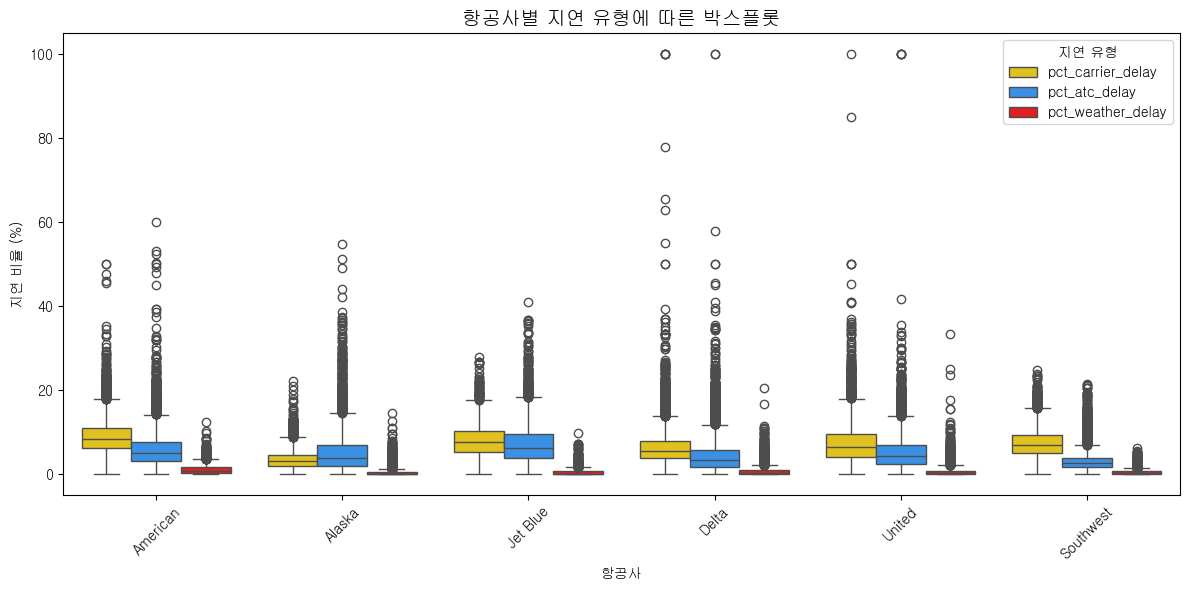

In [26]:
# 항공사별 지연 유형에 따른 (boxplot)
df_melted = pd.melt(df, 
                    id_vars='airline',
                    value_vars=['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay'],
                    var_name='delay_type', value_name='percentage')

# 색상 설정
color_map = {
    'pct_carrier_delay': 'gold',        # 노랑
    'pct_atc_delay': 'dodgerblue',      # 파랑
    'pct_weather_delay': 'red'          # 빨강
}

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='airline', y='percentage', hue='delay_type', palette=color_map)

# 그래프 꾸미기
plt.title('항공사별 지연 유형에 따른 박스플롯', fontsize=14)
plt.xlabel('항공사')
plt.ylabel('지연 비율 (%)')
plt.legend(title='지연 유형')
plt.xticks(rotation=45)
plt.tight_layout()

# 출력
plt.show()

항공사별 carrier_delay는 평균적으로 American항공이 제일 높다.    
항공사별 atc_delay는 평균적으로 Gel_blue항공이 제일 높다.    
항공사별 weather_delay는 평균적으로 American항공이 제일 높다.
    
      
이상치가 많은 줄 알았지만 전체적으로 2~6퍼센트 미만이다.      

# 4. 추가 분석   
분석결과

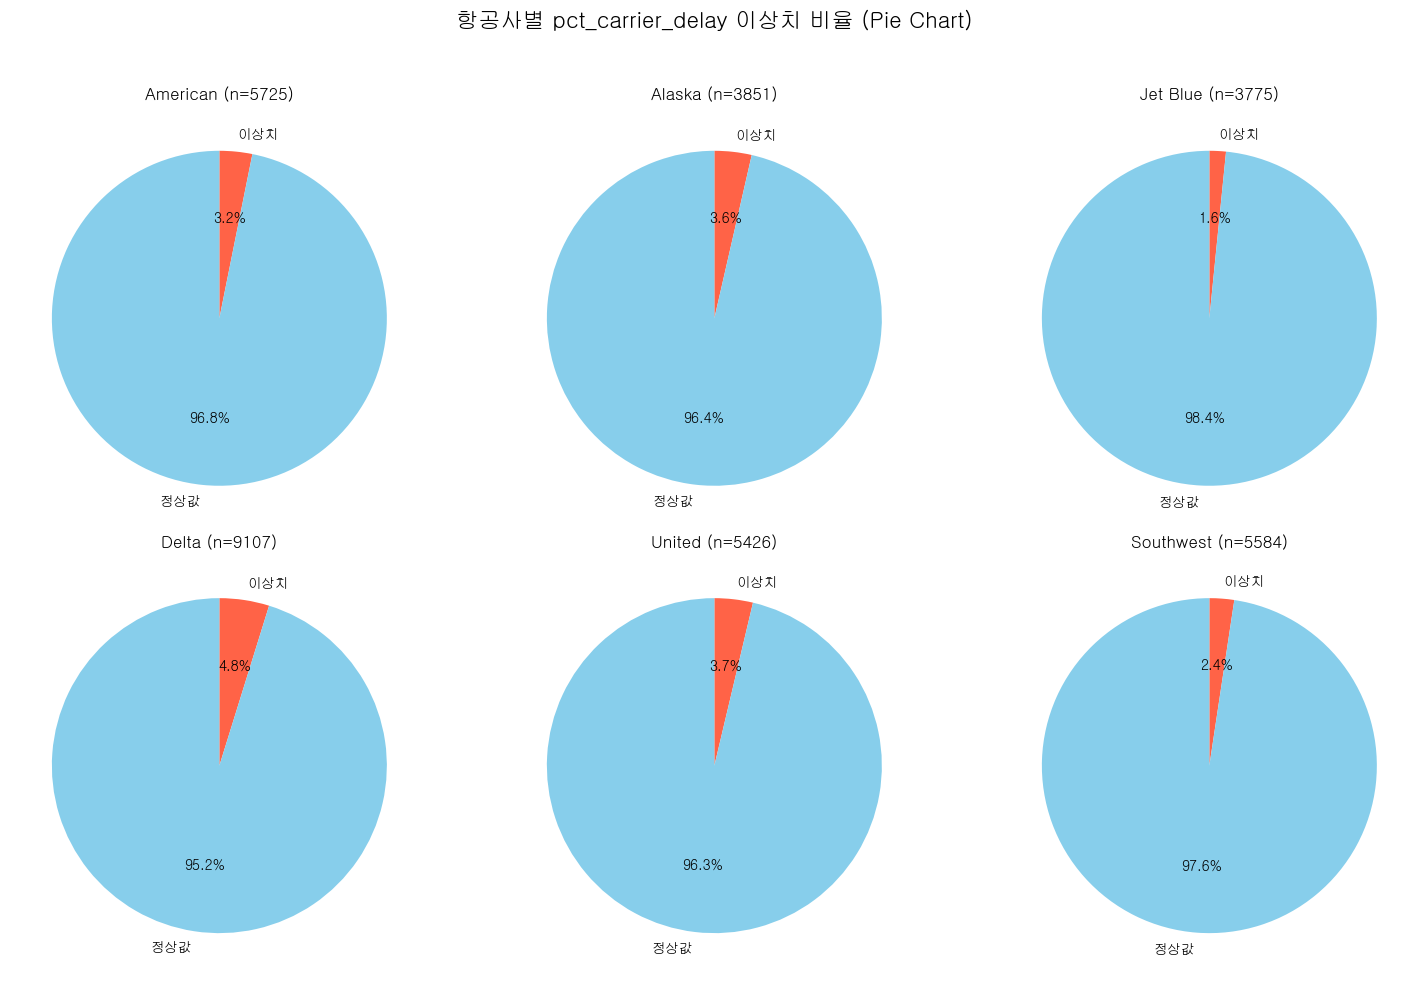

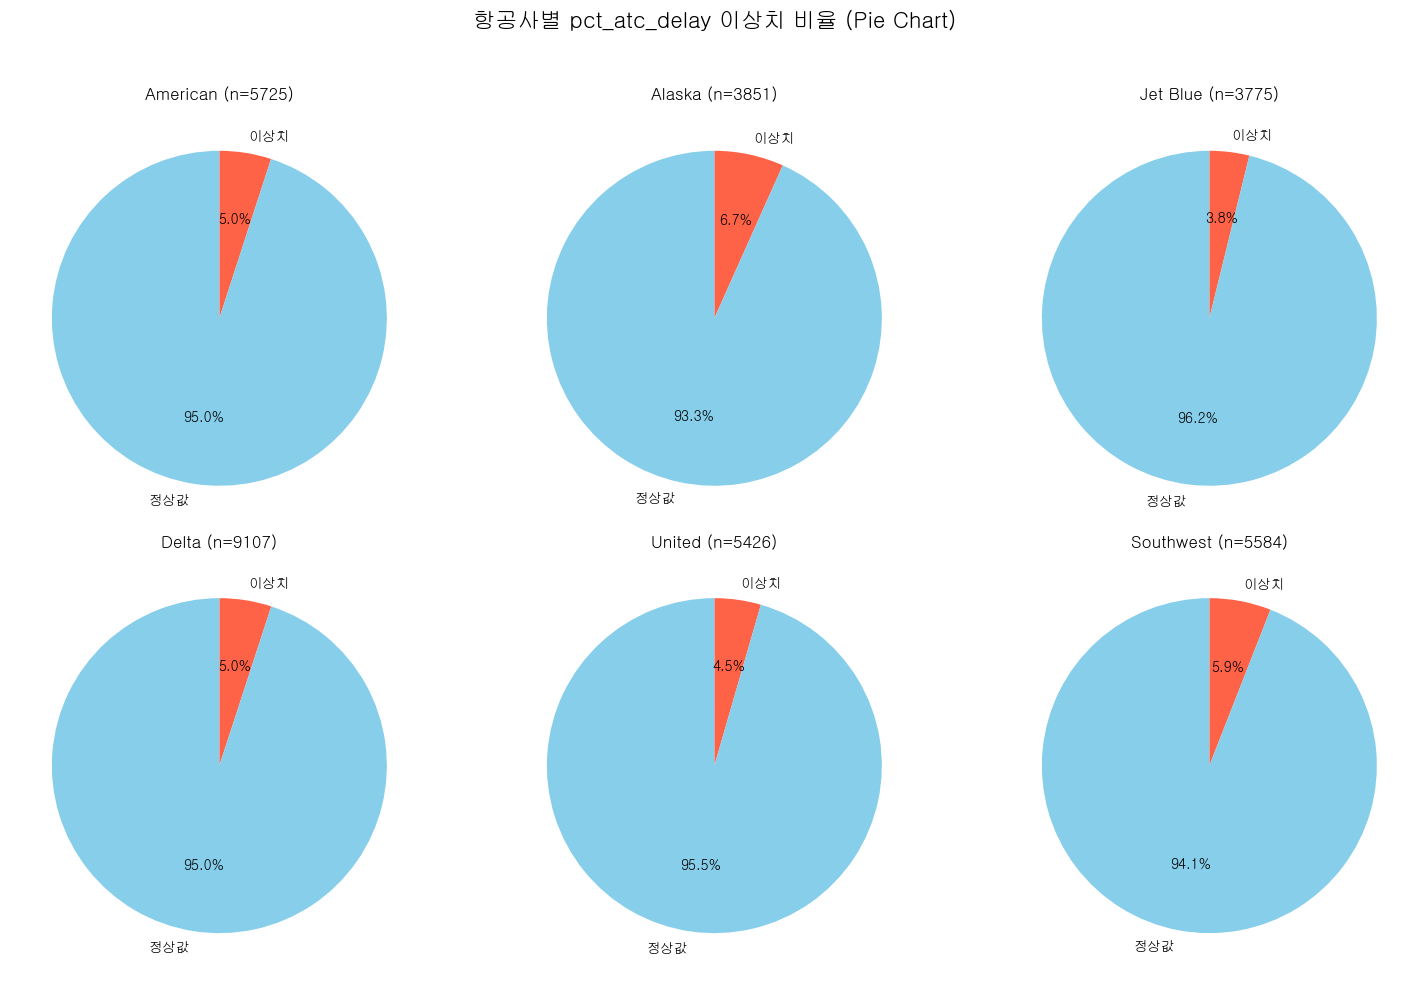

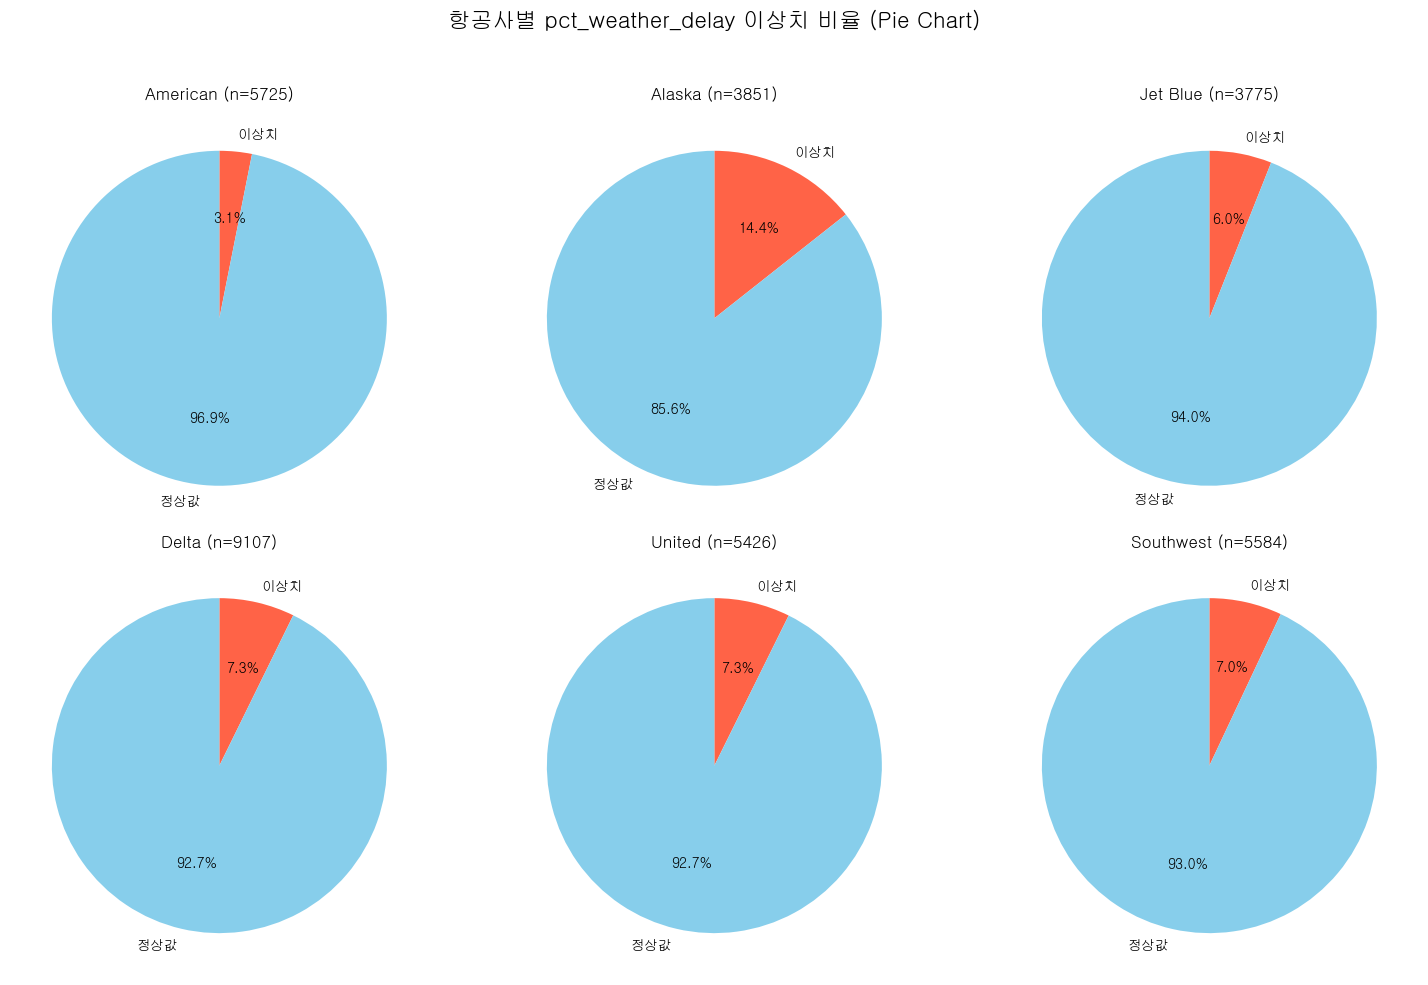

In [27]:
# 항공사 목록
airlines = df['airline'].unique()

# 각 변수마다 반복
for col in numerical_cols:
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs = axs.flatten()

    for i, airline in enumerate(airlines):
        airline_df = df[df['airline'] == airline]

        # IQR 기준 이상치 판별
        Q1 = airline_df[col].quantile(0.25)
        Q3 = airline_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        is_outlier = (airline_df[col] < lower) | (airline_df[col] > upper)
        outlier_count = is_outlier.sum()
        normal_count = (~is_outlier).sum()

        # pie chart
        axs[i].pie(
            [outlier_count, normal_count],
            labels=['이상치', '정상값'],
            autopct='%.1f%%',
            colors=['tomato', 'skyblue'],
            startangle=90,
            counterclock=False
        )
        axs[i].set_title(f'{airline} (n={len(airline_df)})')

    fig.suptitle(f'항공사별 {col} 이상치 비율 (Pie Chart)', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# 5. 상관관계 분석   
분석결과

# 6. 공분산 확인   
분석결과

# 분석 결과 정리

# 추가 : 다음 분석 방향 계획